<a href="https://colab.research.google.com/github/dawg-at-irya/error-propagation/blob/main/error-propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error propagation

Here are three typical situations requiring error propagation:


1.   The mass of a binary system is estimated to be $4.5\pm 1.2$ M$_\odot$. The mass of the primary is independently estimated to be $3.1\pm 0.8$ M$_\odot$. Assuming that both uncertainties are due to Gaussian random noise, what is the secondary mass and its associated uncertainty?

2.   A faint source is measured to have a magnitude $m$ in the 2MASS $J$ band. The uncertainty in this measurement is $m_{\rm err}$. Assuming that the uncertainty is due to Gaussian random noise, what is the corresponding $J$-band flux and its uncertainty?

3.   The Chandrasekhar-Fermi method (Chandrasekhar & Fermi 1953) relates the plane-of-sky field strength to the number density and the dispersions in velocity (km s$^{-1}$) and polarisation angle ($^\circ$):<br><br>
$B_{\rm pos}\approx 9.3\displaystyle{\sqrt{n(\textrm{H}_2)}\ \Delta v\over \langle\sigma_\theta\rangle}$ $\mu$G<br><br>
Given $\Delta v=3.12\pm 0.73$ km s$^{-1}$, $\langle\sigma_\theta\rangle=(4.0\pm 0.3)^\circ$, and $n(\textrm{H}_2)=8.3\pm 6.6 \times 10^{6}$ cm$^{-3}$, find $B_{\rm pos}$ and its uncertainty, assuming that all provided uncertainties are Gaussian.

### Problem 1: the uncertainty of the sum/difference of two Gaussian variables.

This problem is the easiest to solve, and its solution does not depend on the relative quality of the data (i.e., the relative uncertainty).<br>

In frequentist statistics, the binary system has a single "true mass" which is known only to Nature. Repeated measurements result in differing estimates of this true mass because the observations are noisy:<br>
$m_{\rm obs} = m_{\rm true} + \epsilon$<br>
If the noise is random, then its long-term average is zero. Gaussian random noise means that the values of $\epsilon$ are drawn from a Gaussian distribution. This also means that repeated observations will result in a Gaussian distribution of $m_{\rm obs}$ around $m_{\rm true}$ with a standard deviation equal to the standard deviation of $\epsilon$.

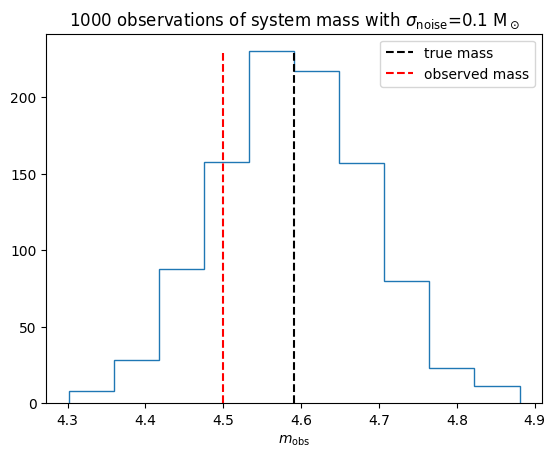

In [26]:
import matplotlib.pyplot as plt
m_true = 4.591
m_obs = 4.50
sig_eps = 0.1
np.random.seed(1001) # reproducibility
m_samp = norm.rvs(loc=m_true, scale=sig_eps, size=1000)

c = plt.hist(m_samp, histtype='step')
plt.plot([m_true, m_true], [0, c[0].max()], 'k--', label='true mass')
plt.plot([m_obs, m_obs], [0, c[0].max()], 'r--', label=r'observed mass')
plt.ylim(0, c[0].max() * 1.05)
plt.title(r'1000 observations of system mass with $\sigma_{\rm noise}$=0.1 M$_\odot$')
plt.xlabel(r'$m_{\rm obs}$')
plt.legend(loc='best')
plt.show()

**The uncertainty in the sum/difference of two Gaussian variables is equal to the sum of uncertainties of the two variables in quadrature**<br>

If $X$ and $Y$ are normally distributed with standard deviations $\sigma_X$ and $\sigma_Y$, then $Z\equiv X\pm Y$ is also normally distributed, with a standard deviation equal to $\sigma_Z = \sqrt{\sigma_X^2 + \sigma_Y^2}$.<br>

Note that the uncertainties always ADD in quadrature regardless of whether the original variables are being added or subtracted.


In [29]:
m_obs_tot, sig_m_tot = 4.5, 1.2
m_obs_pri, sig_m_pri = 3.1, 0.8
m_obs_sec = m_obs_tot - m_obs_pri
sig_m_sec = np.sqrt(sig_m_tot**2 + sig_m_pri**2)

print(f"The secondary mass is {np.round(m_obs_sec, decimals=2)}")
print(f"Its uncertainty is {np.round(sig_m_sec, decimals=2)}")


The secondary mass is 1.4
Its uncertainty is 1.44


Yikes, in this case the data quality is low enough that negative secondary masses are, in principle, not entirely excluded.

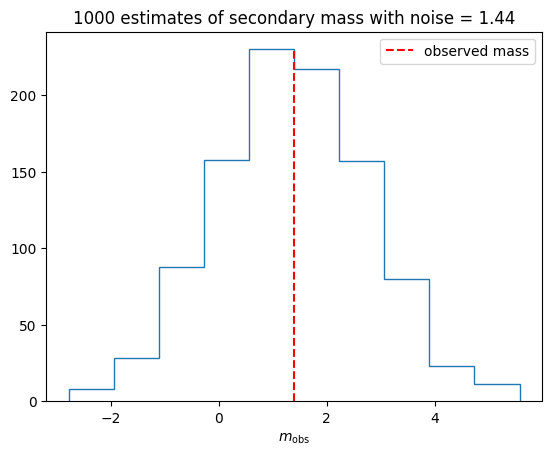

In [38]:
np.random.seed(1001) # reproducibility
m_sec_samp = norm.rvs(loc=m_obs_sec, scale=sig_m_sec, size=1000)

c = plt.hist(m_sec_samp, histtype='step')
plt.plot([m_obs_sec, m_obs_sec], [0, c[0].max()], 'r--', label=r'observed mass')
plt.ylim(0, c[0].max() * 1.05)
plt.title(f'1000 estimates of secondary mass with noise = {np.round(sig_m_sec, decimals=2)}')
plt.xlabel(r'$m_{\rm obs}$')
plt.legend(loc='best')
plt.show()

###Problem 2: nonlinear functions and error propagation

This problem deals with one of the most frequently-used nonlinear transformations used in astronomy, that of conversions between magnitudes and fluxes.<br>

There are two important considerations when propagating uncertainties in this situation.


1.  **The distribution of the uncertainty in the nonlinear function is NOT Gaussian. In fact, it may not even be symmetric, in which case a single uncertainty value does not have the same meaning (in the $\pm$ sense).**


>> As an example, let's consider the transformation $y = \log_{10}{x}$. Let $x$ be a Gaussian variable with mean value $x_{_0}$ and uncertainty $\sigma_x$.


<ipython-input-62-bbd97b08d8c8>:12: RuntimeWarning: invalid value encountered in log10
  y_samp = np.log10(x_samp)


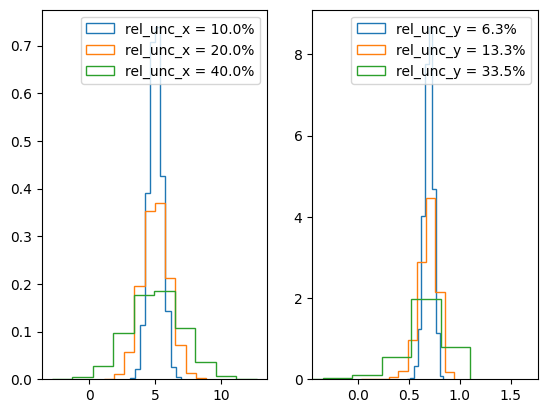

In [62]:
x0 = 5
sigma_x = np.array([0.5, 1.0, 2.0])
fig, (ax1, ax2) = plt.subplots(1, 2)
for sig in sigma_x:
  rel_unc_x = np.round(100 * sig / x0, decimals=1)
  # print(f"The relative uncertainty in x is {rel_unc_x}%")

  np.random.seed(10001)
  x_samp = norm.rvs(loc=x0, scale=sig, size=10000)
  _ = ax1.hist(x_samp, histtype='step', label=f'rel_unc_x = {rel_unc_x}%', density=True)

  y_samp = np.log10(x_samp)
  y0 = np.nanmean(y_samp)
  sigma_y = np.nanstd(y_samp)
  rel_unc_y = np.round(100 * sigma_y / y0, decimals=1)
  # print(f"The mean value of y is {np.round(y0, decimals=1)}")
  # print(f"The relative uncertainty estimated for y is {rel_unc_y}%")

  _ = ax2.hist(y_samp, histtype='step', label=f'rel_unc_y = {rel_unc_y}%', density=True)

ax1.legend(loc='best')
ax2.legend(loc='best')
_ = ax2.set_xlim(y0 - 5 * sigma_y, y0 + 5 * sigma_y)

>>Notice
>>1.  The distribution of $x$ is always Gaussian, but its spread increases until it eventually samples negative values.
>>2.  The distribution of $\log_{10}{x}$ deviates from symmetry/Gaussianity as the relative uncertainty in $x$ increases. The distribution is skewed towards smaller values.
>>3.  Negative values for $x$ produce invalid values of $\log_{10}{x}$, which are not represented in the second plot. However, these NaNs will result in NaN means and standard deviations unless filtered out.


2.   **The method of computing the uncertainty typically involves assuming that the function is linear. For nonlinear functions, one needs to check whether this assumption will still produce an accurate uncertainty estimate.**


>>The typical procedure for error propagation for functions of a variable is to use the Taylor Series:<br>
>>$\hspace{4ex}f(x_{_0} + \Delta x_{_0}) - f(x_{_0}) \equiv \Delta f = \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x\ + \Bigg(\displaystyle{d^2f(x)\over dx^2}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^2\over 2!}\ + \Bigg(\displaystyle{d^3f(x)\over dx^3}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^3\over 3!}\ + \cdots$<br>
>>which is then truncated to first order:<br>
$\hspace{4ex} \Delta f \approx \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x$<br>
>>The above expression is exact for linear functions, so it works when used for linear combinations, such as for Problem 1 (using partial derivatives w.r.t. each variable).<br>
>>For nonlinear functions, the validity of the approximation depends on the magnitude of $\Delta x$.<br>

<br><br><br>

>>Note the special case for $y = \ln{x}$: the exact expression for the uncertainty can be written!
>>Using the Taylor expansion for $y = \ln{x}$,<br>
>>$|\Delta y| = \displaystyle{\Delta x\over x_{_0}} + \displaystyle{1\over 2}\Bigg(\displaystyle{\Delta x\over x_{_0}}\Bigg)^2 + \displaystyle{1\over 3}\Bigg(\displaystyle{\Delta x\over x_{_0}}\Bigg)^3 + \cdots$<br>
>>From the definition of the logarithm, the RHS is $\ln{\Bigg(1-\displaystyle{\Delta x\over x_{_0}}\Bigg)}$. Therefore,<br>
>>$\Delta y = \ln{\Bigg(1-\displaystyle{\Delta x\over x_{_0}}\Bigg)}$

#### A more meaningful error estimate for asymmetric distributions/nonlinear functions<br>

For asymmetric functions, the mean, median, and mode do not coincide. In addition, the standard deviation is no longer an intuitive measure of the spread around the typical value. We can compute a 68% interval and use its bounds as the left and right uncertainties instead.<br>

A 68% **equal-tailed confidence/credible interval** is such that it **rejects 16% probability on either side of it**. Such an interval will **always include the median (which is the location to either side of which there is 50% of the probability mass)**, but there's no guarantee that it will include the mean or mode (especially for highly asymmetric functions).

It therefore makes sense to quote the 16th, 50th, and 84th percentiles for asymmetric distributions.

In [96]:
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
x0 = 5.0
sigma_x = 2.0
np.random.seed(10001)
x_samp = norm.rvs(loc=x0, scale=sigma_x, size=10000)
y_samp = np.log10(x_samp)

y_mean = np.nanmean(y_samp)
y_std = np.nanstd(y_samp)
k = np.nonzero(x_samp > 0)[0]
p0, p1, p2 = np.percentile(y_samp[k], [16, 50, 84])


print(f"Mean: {y_mean}")
print(f"Median: {str(p[1])}")
print(f"68% equal-tailed interval: {np.round(p0, 2), np.round(p2, 2)}")
# print(r"${0}_{1}^{2}$".format(str(p[1]), str(p[0]-p[1]), str(p[2]-p[1])))
print(f"Therefore, quoted result: {np.round(p1, 2)} {np.round(p0-p1, 2), np.round(p2-p1, 2)}")

Mean: 0.6609076553715348
Median: 0.7
68% equal-tailed interval: (0.49, 0.85)
Therefore, quoted result: 0.7 (-0.21, 0.14)



2.   The method of computing the uncertainty typically involves assuming that the function is linear. For nonlinear functions, one needs to check whether this assumption will still produce an accurate uncertainty estimate.


The typical procedure for error propagation for functions of a variable is to use the Taylor Series:<br>
$\hspace{4ex}f(x_{_0} + \Delta x_{_0}) - f(x_{_0}) \equiv \Delta f = \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x\ + \Bigg(\displaystyle{d^2f(x)\over dx^2}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^2\over 2!}\ + \Bigg(\displaystyle{d^3f(x)\over dx^3}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^3\over 3!}\ + \cdots$,<br>

Which is then truncated to first order:<br>
$\hspace{4ex} \Delta f \approx \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x$<br>

The above expression is exact for linear functions, so it works when used for linear combinations, such as for Problem 1 (using partial derivatives w.r.t. each variable).<br>

For nonlinear functions, the validity of the approximation depends on the magnitude of $\Delta x$.<br>

In [5]:
import numpy as np
from scipy.stats import norm
!pip install astroquery
from astroquery.svo_fps import SvoFps

Aside: magnitude <--> flux conversion formulae<br><br>
$\hspace{4ex}F = F_{\rm zp} \times 10^{-m / \alpha}$<br>
$\hspace{4ex}m = -\alpha \times \log_{10}{\displaystyle{F \over F_{\rm zp}}}$,<br><br>
where $\alpha=100^{1/5}\approx 2.51189$. Most people/papers/introductory astro books use either 2.5 or 2.512.

The most automated way to retrieve information for a standard filter is to obtain it from an online resource, such as the Spanish Virtual Observatory's Filter Profile Service using a Python package such as astroquery:

In [10]:
filter_list = SvoFps.get_filter_list(facility='2MASS')
fZP = filter_list['filterID' == '2MASS/2MASS.J']['ZeroPoint']

Why?<br>
1. reproducibility: if everyone uses the same resource, our results agree.
2. prevention of reduplication/reduction of effort: if everyone uses an existing resource, we spend less effort and our results agree.
3. scalability/automation: easily extended to large numbers of filters, or multiple iterations.


In [21]:
alpha = 100**(1/5.0)
print(f"True value: {alpha}")
print(f"% error if using 2.5: {np.round(np.abs(2.5 - alpha) / alpha * 100, decimals=2)}")
print(f"% error if using 2.512: {np.round(np.abs(2.512 - alpha) / alpha * 100, decimals=3)}")

True value: 2.51188643150958
% error if using 2.5: 0.47
% error if using 2.512: 0.005


DONEDONEDONEDONE

In [106]:
import numpy as np
from scipy.stats import norm
def mag2flux(f, ferr, fzp):
  alpha = 100**(1/5.0)
  m = -alpha * np.log10(f / fzp)

  f_samp = norm.rvs(loc=f, scale=ferr, size=10000)
  m_samp = -alpha * np.log10(f_samp / fzp)
  m_samp_mean = np.nanmean(m_samp)
  m_samp_std = np.nanstd(m_samp)
  k = np.nonzero(f_samp > 0.0)[0]
  m_samp_p1, m_samp_median, m_samp_p2 = np.percentile(m_samp[k], [16, 50, 84])

  merr_Taylor1 = alpha / np.log(10.0) * ferr / f
  merr_Taylor2 = -alpha * np.log10(1 - ferr / f)

  return m, m_samp_mean, m_samp_median, m_samp_p1, m_samp_p2, merr_Taylor1, merr_Taylor2

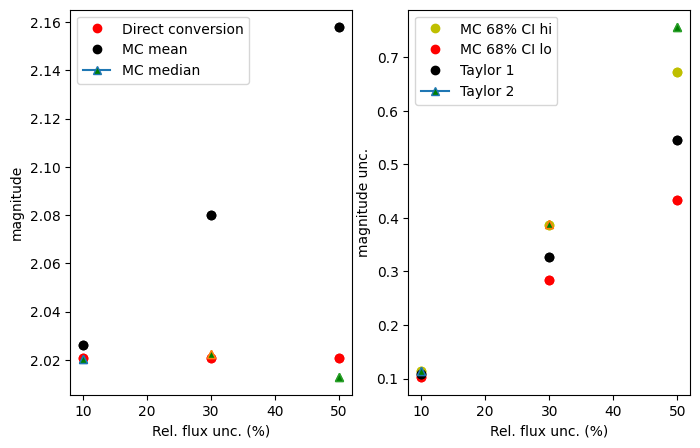

In [120]:
import matplotlib.pyplot as plt
# !pip install astroquery
from astroquery.svo_fps import SvoFps
filter_list = SvoFps.get_filter_list(facility='2MASS')
fzp = filter_list['filterID' == '2MASS/2MASS.J']['ZeroPoint']


f = 250
ferr = np.array([25.0, 75.0, 125.0])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5))
for i, df in enumerate(ferr):
  m, msm, msmed, msp1, msp2, mt1, mt2 = mag2flux(f, df, fzp)
  if i == 0:
    ax1.plot([100 * df / f, 100 * df / f], [m, m], 'ro', label='Direct conversion')
    ax1.plot([100 * df / f, 100 * df / f], [msm, msm], 'ko', label='MC mean')
    ax1.plot([100 * df / f, 100 * df / f], [msmed, msmed], marker='^', markerfacecolor='g', label='MC median', zorder=100)
    ax2.plot([100 * df / f, 100 * df / f], [msp2-msmed, msp2-msmed], 'yo', label='MC 68% CI hi')
    ax2.plot([100 * df / f, 100 * df / f], [msmed-msp1, msmed-msp1], 'ro', label='MC 68% CI lo')
    ax2.plot([100 * df / f, 100 * df / f], [mt1, mt1], 'ko', label='Taylor 1')
    ax2.plot([100 * df / f, 100 * df / f], [mt2, mt2], marker='^', markerfacecolor='g', label='Taylor 2', zorder=100)
  else:
    ax1.plot([100 * df / f, 100 * df / f], [m, m], 'ro')
    ax1.plot([100 * df / f, 100 * df / f], [msm, msm], 'ko')
    ax1.plot([100 * df / f, 100 * df / f], [msmed, msmed],  marker='^', markerfacecolor='g', zorder=100)
    ax2.plot([100 * df / f, 100 * df / f], [msp2-msmed, msp2-msmed], 'yo')
    ax2.plot([100 * df / f, 100 * df / f], [msmed-msp1, msmed-msp1], 'ro')
    ax2.plot([100 * df / f, 100 * df / f], [mt1, mt1], 'ko')
    ax2.plot([100 * df / f, 100 * df / f], [mt2, mt2], marker='^', markerfacecolor='g', zorder=100)

_ = ax1.legend(loc='best')
_ = ax2.legend(loc='best')
_ = ax1.set_xlabel('Rel. flux unc. (%)')
_ = ax2.set_xlabel('Rel. flux unc. (%)')
_ = ax1.set_ylabel('magnitude')
_ = ax2.set_ylabel('magnitude unc.')